# Forecasting Fertilizer Efficiency and Agricultural Productivity in East Africa

## Problem Statement 
East Africa depends heavily on agriculture, but productivity remains low. Fertilizer usage is rising, yet efficiency and yield gains are unclear. There is need to optimize fertilizer use to sustainably boost agricultural output using historical data.

#  Business Understanding

## 1. Project Title 
Forecasting Fertilizer Efficiency and Agricultural Productivity in East Africa  
*"Optimizing agricultural growth through smart data-driven fertilizer strategies"*



## 2. Overview
Agriculture forms the backbone of East Africa’s economy, employing over 60% of the region’s workforce and contributing significantly to GDP. However, the region continues to struggle with low agricultural productivity despite increased access to agricultural inputs like fertilizers. Governments and development partners have ramped up investment in fertilizer subsidies and distribution programs, yet the return on these efforts remains ambiguous. Are these inputs translating into higher yields and sustainable food production?



## 3. Business Problem
Fertilizer use is rising across East Africa, but crop yield improvements are inconsistent and vary widely between countries. Policymakers, NGOs, and agritech investors are concerned that fertilizer is being applied inefficiently, without data-driven guidance. Without clear insights into the fertilizer productivity relationship and future needs, policies may misallocate resources, and farmers may suffer from suboptimal yields.There is need to optimize fertilizer use to sustainably boost agricultural output using historical data.


## 4. Project Objective

### Main Objectives
- To develop a data-driven framework that forecasts fertilizer usage and supports sustainable agricultural productivity across East Africa, empowering stakeholders with insights that guide better policies, investments, and resource allocation.

### Specific Objectives
1. To analyze historical fertilizer consumption trends across East African countries from 1960 to 2023.


2. To investigate the relationship between fertilizer usage and agricultural productivity indicators.


3. To develop time-series models for forecasting future fertilizer demand up to 2035.


4. To build machine learning models that predict productivity outcomes based on fertilizer use and other variables.


5. To cluster countries with similar fertilizer efficiency patterns for targeted policy recommendations.


6. To generate insights and actionable strategies that support sustainable agriculture and food security beyond the scope of the project.



## 5. Stakeholders
- **National Ministries of Agriculture** – for strategic input planning and subsidies  
- **Regional Bodies** (EAC, IGAD) – for coordination and policy harmonization  
- **Farmers' Cooperatives** – to optimize fertilizer application practices  
- **Agritech Companies** – to align product offerings with market needs  
- **Donors & NGOs** (FAO, World Bank) – for evaluating the impact of their interventions  
- **Investors** – identifying high-potential regions for agricultural investment



## 6. Scope
- **Countries:** East African states recognized by the United Nations  
- **Timeframe:** 1960–2023  
- **Data Sources:** World Bank, FAO, and national statistics  
- **Indicators:** Fertilizer use (kg/hectare), productivity measures, rural population, arable land  
- **Out of Scope:** Non-crop agriculture (e.g., livestock productivity), fertilizer manufacturing economics


## 7. Business Value
This project delivers a data-driven foundation for improving food security, optimizing fertilizer subsidies, and guiding investment in sustainable agriculture. By understanding fertilizer efficiency across East Africa, stakeholders can make smarter, targeted decisions improving yields, reducing waste, and ultimately boosting economic and human development across the region.



## 8. Success Metrics

1. **Accuracy of Forecasting Models**:  
   - Achieve a minimum accuracy of X% (e.g., >85%) in time-series forecasting models for fertilizer demand by 2035.
   - Low Mean Absolute Percentage Error (MAPE) or Root Mean Square Error (RMSE) for predictions.

2. **Correlation Strength**:  
   - Strong positive correlation (R^2 value > Y, e.g., >0.7) between fertilizer usage and agricultural productivity indicators.

3. **Cluster Performance**:  
   - Clustering models should identify distinct groups of countries with > Z% homogeneity in fertilizer efficiency patterns.

4. **Actionable Insights**:  
   - Deliver at least 5 region-specific actionable policy recommendations supported by the analysis.
   - Produce a comprehensive report used by at least 3 stakeholders (e.g., Ministries, NGOs, donors).

5. **User Engagement**:  
   - Stakeholder satisfaction score >80% based on post-project surveys.
   - Adoption of the framework by at least 2 East African governments, donor agencies, or agritech companies.

6. **Impact on Sustainable Development**:  
   - Quantifiable increase in agricultural productivity or efficiency in pilot regions where recommendations are implemented (e.g., productivity increase by X metric tons/hectare).

7. **Visualization and Accessibility**:  
   - Interactive dashboards (Tableau or equivalent) with user-friendly designs evaluated positively by stakeholders.
   - 100% of key findings accessible to stakeholders via reports, presentations, or dashboards.



## 9. Tools & Technologies

This project utilizes the following tools and technologies:

- **Languages**: Python (Pandas, NumPy, Matplotlib, Seaborn)
- **Machine Learning & Forecasting**: Scikit-learn, XGBoost, Statsmodels (ARIMA), TensorFlow/Keras (LSTM)
- **Unsupervised Learning**: Scikit-learn (K-Means), PCA
- **Visualization**: Seaborn,  Tableau 
- **Data Sources**: World Bank Open Data, FAO
- **Platform**: Jupyter Notebook, GitHub for version control and collaboration

## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

### Exploring the data 
Starting with the Tanzania dataset

In [3]:
df = pd.read_csv('data/Tanzania.csv')
df.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Tanzania,TZA,1991,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,868.817768450507
2,Tanzania,TZA,1990,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,954.128440366972
3,Tanzania,TZA,1989,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,615.277777777778
4,Tanzania,TZA,1988,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,2878.47658979734


Observation:  
There is some redundancy, i.e. we have two rows giving metadata (country name, code etc.) of the dataset. One has to be removed.

In [4]:
# Dropping one of the redundant rows
df.drop(0, inplace=True)
df.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1,Tanzania,TZA,1991,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,868.817768450507
2,Tanzania,TZA,1990,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,954.128440366972
3,Tanzania,TZA,1989,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,615.277777777778
4,Tanzania,TZA,1988,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,2878.47658979734
5,Tanzania,TZA,1987,Fertilizer consumption (% of fertilizer produc...,AG.CON.FERT.PT.ZS,998.351419031719


In [5]:
df.tail()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1597,Tanzania,TZA,1984,Economically active population in agriculture ...,EN.AGR.EMPL,8810000
1598,Tanzania,TZA,1983,Economically active population in agriculture ...,EN.AGR.EMPL,8545000
1599,Tanzania,TZA,1982,Economically active population in agriculture ...,EN.AGR.EMPL,8289000
1600,Tanzania,TZA,1981,Economically active population in agriculture ...,EN.AGR.EMPL,8042000
1601,Tanzania,TZA,1980,Economically active population in agriculture ...,EN.AGR.EMPL,7806000


Observation:  
The data is uniform, but the indicator names have different values at the top and bottom of the dataset, they have to be explored further.

In [6]:
df.shape

(1601, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 1 to 1601
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    1601 non-null   object
 1   Country ISO3    1601 non-null   object
 2   Year            1601 non-null   object
 3   Indicator Name  1601 non-null   object
 4   Indicator Code  1601 non-null   object
 5   Value           1601 non-null   object
dtypes: object(6)
memory usage: 75.2+ KB


Observation:  
There are no null values, and all columns are of type 'object'.

## Combining all the datasets

In [8]:
# Path to folder with all country CSV files
folder_path = "data/"

# Initialize empty list to collect all cleaned data
all_dfs = []

for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        
        # Read the file, skipping the first row
        df = pd.read_csv(file_path, skiprows=1)
        
        all_dfs.append(df)

# Combine all into one large DataFrame
df_all = pd.concat(all_dfs, ignore_index=True)


In [9]:
df_all.head()

,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
0,Burundi,BDI,2022,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,39.789866
1,Burundi,BDI,2021,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,19.074362
2,Burundi,BDI,2020,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,19.488689
3,Burundi,BDI,2019,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,19.921414
4,Burundi,BDI,2018,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,24.000934


In [10]:
df_all.tail()

,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
21183,Uganda,UGA,1984,Economically active population in agriculture ...,EN.AGR.EMPL,5515000.0
21184,Uganda,UGA,1983,Economically active population in agriculture ...,EN.AGR.EMPL,5360000.0
21185,Uganda,UGA,1982,Economically active population in agriculture ...,EN.AGR.EMPL,5217000.0
21186,Uganda,UGA,1981,Economically active population in agriculture ...,EN.AGR.EMPL,5079000.0
21187,Uganda,UGA,1980,Economically active population in agriculture ...,EN.AGR.EMPL,4946000.0


The data is uniform.

In [11]:
df_all.shape

(21188, 6)

In [12]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21188 entries, 0 to 21187
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #country+name         21188 non-null  object 
 1   #country+code         21188 non-null  object 
 2   #date+year            21188 non-null  int64  
 3   #indicator+name       21188 non-null  object 
 4   #indicator+code       21188 non-null  object 
 5   #indicator+value+num  21188 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 993.3+ KB


In [13]:
df_all.rename(columns={
    "#country+name": "country_name",
    "#country+code": "country_code",
    "#date+year": "year",
    "#indicator+name": "indicator_name",
    "#indicator+code": "indicator_code",
    "#indicator+value+num": "value"
}, inplace=True)


Looking at the number of unique values next

In [14]:
for col in df_all.columns:
    unique_vals = df_all[col].unique()
    print(f"Column '{col}' has {len(unique_vals)} unique value(s):")
    print(f"Unique values: {list(unique_vals)}\n")

Column 'country_name' has 15 unique value(s):
Unique values: ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Madagascar', 'Mauritius', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan', 'Sudan', 'Tanzania', 'Uganda']

Column 'country_code' has 15 unique value(s):
Unique values: ['BDI', 'COM', 'DJI', 'ERI', 'ETH', 'KEN', 'MDG', 'MUS', 'RWA', 'SYC', 'SOM', 'SSD', 'SDN', 'TZA', 'UGA']

Column 'year' has 64 unique value(s):
Unique values: [2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 2023, 1960]

Column 'indicator_name' has 37 unique value(s):
Unique values: ['Fertilizer consumption (kilograms per hectare of arable land)', 'Agricultural land (sq. km)

A lot of different features seem to be located in the `indicator_name` column. We need to extract the features there and have them as our columns. However, since they are quite many (37), we'll just extract a few of them which will be useful or relevant for our objectives.

In [15]:
relevant_indicators = [
    "Fertilizer consumption (kilograms per hectare of arable land)",
    "Cereal yield (kg per hectare)",
    "Crop production index (2014-2016 = 100)",
    "Average precipitation in depth (mm per year)",
    "Arable land (hectares per person)",
    "Cereal production (metric tons)",
    "Agriculture, forestry, and fishing, value added (current US$)",
    "Employment in agriculture (% of total employment) (modeled ILO estimate)",
]

df_filtered = df_all[df_all["indicator_name"].isin(relevant_indicators)]
df_filtered.head()

,country_name,country_code,year,indicator_name,indicator_code,value
0,Burundi,BDI,2022,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,39.789866
1,Burundi,BDI,2021,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,19.074362
2,Burundi,BDI,2020,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,19.488689
3,Burundi,BDI,2019,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,19.921414
4,Burundi,BDI,2018,Fertilizer consumption (kilograms per hectare ...,AG.CON.FERT.ZS,24.000934


In [16]:
df_filtered.tail()

,country_name,country_code,year,indicator_name,indicator_code,value
20897,Uganda,UGA,1995,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,82.638169
20898,Uganda,UGA,1994,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,83.050163
20899,Uganda,UGA,1993,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,83.217775
20900,Uganda,UGA,1992,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,83.437099
20901,Uganda,UGA,1991,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,83.492156


## Making the relevant indicators part of the columns

In [17]:
df_pivot = df_filtered.pivot_table(
    index=["country_name", "country_code", "year"],
    columns="indicator_name",
    values="value"
).reset_index()

df_pivot

indicator_name,country_name,country_code,year,"Agriculture, forestry, and fishing, value added (current US$)",Arable land (hectares per person),Average precipitation in depth (mm per year),Cereal production (metric tons),Cereal yield (kg per hectare),Crop production index (2014-2016 = 100),Employment in agriculture (% of total employment) (modeled ILO estimate),Fertilizer consumption (kilograms per hectare of arable land)
0,Burundi,BDI,1961,NaN,0.238085,1274.0,130000.00,946.2,49.34,NaN,NaN
1,Burundi,BDI,1962,NaN,0.240720,1274.0,129150.00,1010.6,49.17,NaN,NaN
2,Burundi,BDI,1963,NaN,0.243784,1274.0,130080.00,919.6,48.98,NaN,NaN
3,Burundi,BDI,1964,NaN,0.243483,1274.0,148680.00,991.9,54.31,NaN,NaN
4,Burundi,BDI,1965,NaN,0.240660,1274.0,148278.00,983.6,53.79,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
884,Uganda,UGA,2019,8.110814e+09,0.160466,1180.0,3119000.00,2841.5,122.78,61.360432,3.366272
885,Uganda,UGA,2020,8.997405e+09,0.155206,1180.0,5190000.00,3025.6,153.38,64.071754,2.442355
886,Uganda,UGA,2021,9.663033e+09,0.150291,1180.0,7336556.00,4345.3,169.72,66.666067,2.442355
887,Uganda,UGA,2022,1.094102e+10,NaN,NaN,3876857.93,2289.5,148.35,66.329932,2.614987


Looking at the state of the missing values

In [18]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   country_name                                                              889 non-null    object 
 1   country_code                                                              889 non-null    object 
 2   year                                                                      889 non-null    int64  
 3   Agriculture, forestry, and fishing, value added (current US$)             633 non-null    float64
 4   Arable land (hectares per person)                                         832 non-null    float64
 5   Average precipitation in depth (mm per year)                              749 non-null    float64
 6   Cereal production (metric tons)                                   

Since the column `Employment in agriculture (% of total employment) (modeled ILO estimate)` has a lot of missing values (only 461 non-null), we will drop this column, then impute the other columns.

### Impute missing values using KNN imputation

In [19]:
df_imputed = df_pivot.copy()
numeric_cols = df_imputed.select_dtypes(include='number').columns.drop("year")

for country in df_imputed['country_name'].unique():
    country_mask = df_imputed['country_name'] == country
    df_country = df_imputed.loc[country_mask].copy()

    # Skip if too few rows to impute
    if df_country.shape[0] < 2:
        continue

    # Extract numeric columns (ensure they exist)
    country_numeric = df_country[numeric_cols]

    # Drop columns that are entirely NaN (we can't impute those)
    cols_with_data = country_numeric.columns[country_numeric.notna().any()]
    if len(cols_with_data) < 2:
        continue  # skip if not enough features with data

    # Scale
    scaler = StandardScaler()
    scaled = scaler.fit_transform(country_numeric[cols_with_data])

    # Impute
    imputer = KNNImputer(n_neighbors=2)
    imputed_scaled = imputer.fit_transform(scaled)

    # Inverse scale
    imputed = scaler.inverse_transform(imputed_scaled)

    # Place back the imputed values
    df_imputed.loc[country_mask, cols_with_data] = imputed
    
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   country_name                                                              889 non-null    object 
 1   country_code                                                              889 non-null    object 
 2   year                                                                      889 non-null    int64  
 3   Agriculture, forestry, and fishing, value added (current US$)             889 non-null    float64
 4   Arable land (hectares per person)                                         889 non-null    float64
 5   Average precipitation in depth (mm per year)                              889 non-null    float64
 6   Cereal production (metric tons)                                   

Most of the values have been imputed, only two columns still have a few missing values. We can impute those remaining missing values with the median, to avoid skewing our data.

In [20]:
# Fill remaining missing values with column medians
df_imputed.fillna(df_imputed.median(numeric_only=True), inplace=True)

In [21]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   country_name                                                              889 non-null    object 
 1   country_code                                                              889 non-null    object 
 2   year                                                                      889 non-null    int64  
 3   Agriculture, forestry, and fishing, value added (current US$)             889 non-null    float64
 4   Arable land (hectares per person)                                         889 non-null    float64
 5   Average precipitation in depth (mm per year)                              889 non-null    float64
 6   Cereal production (metric tons)                                   

Now we do not have any missing values.  
The type of the `year` column is int though. We need to change it to Datetime type.

In [22]:
# Convert the 'year' column to datetime 
df_imputed['year'] = pd.to_datetime(df_imputed['year'], format='%Y')

In [23]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype         
---  ------                                                                    --------------  -----         
 0   country_name                                                              889 non-null    object        
 1   country_code                                                              889 non-null    object        
 2   year                                                                      889 non-null    datetime64[ns]
 3   Agriculture, forestry, and fishing, value added (current US$)             889 non-null    float64       
 4   Arable land (hectares per person)                                         889 non-null    float64       
 5   Average precipitation in depth (mm per year)                              889 non-null    float64       
 6   Cereal pro

We can now save it as a clean csv file now.

In [24]:
df_imputed.to_csv('clean/df_clean.csv', index=False)

## EDA

In [25]:
df = pd.read_csv('clean/df_clean.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   country_name                                                              889 non-null    object 
 1   country_code                                                              889 non-null    object 
 2   year                                                                      889 non-null    object 
 3   Agriculture, forestry, and fishing, value added (current US$)             889 non-null    float64
 4   Arable land (hectares per person)                                         889 non-null    float64
 5   Average precipitation in depth (mm per year)                              889 non-null    float64
 6   Cereal production (metric tons)                                   

We need to first convert the year to datetime format and extract the year as an integer.

In [35]:
df['year'] = pd.to_datetime(df['year']).dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   country_name                                                              889 non-null    object 
 1   country_code                                                              889 non-null    object 
 2   year                                                                      889 non-null    int32  
 3   Agriculture, forestry, and fishing, value added (current US$)             889 non-null    float64
 4   Arable land (hectares per person)                                         889 non-null    float64
 5   Average precipitation in depth (mm per year)                              889 non-null    float64
 6   Cereal production (metric tons)                                   

## Univariate analysis

### Fertilizer consumption (kg/hectare)

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


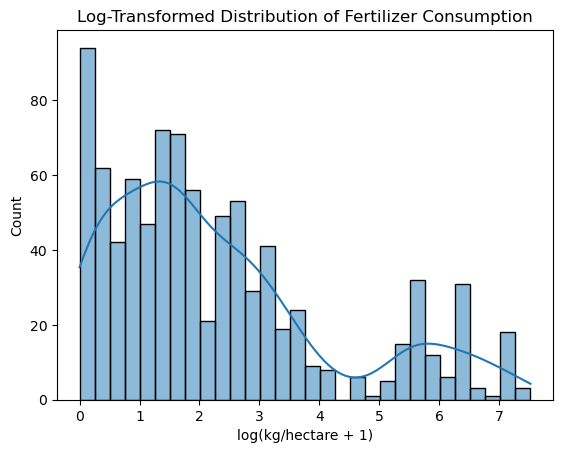

In [28]:
# Add a small constant to avoid log(0)
data = df['Fertilizer consumption (kilograms per hectare of arable land)'] + 1

sns.histplot(np.log(data), kde=True, bins=30)
plt.title('Log-Transformed Distribution of Fertilizer Consumption')
plt.xlabel('log(kg/hectare + 1)')
plt.show()

The data shows that fertilizer consumption across countries is highly uneven. Most countries use relatively small amounts of fertilizer per hectare, while a smaller group uses much higher amounts. After applying a log transformation to adjust for this imbalance, we observed distinct usage patterns, suggesting that countries may fall into different categories of fertilizer use—ranging from low-input to high-input agriculture. This highlights the need for tailored agricultural policies and interventions rather than a one-size-fits-all approach

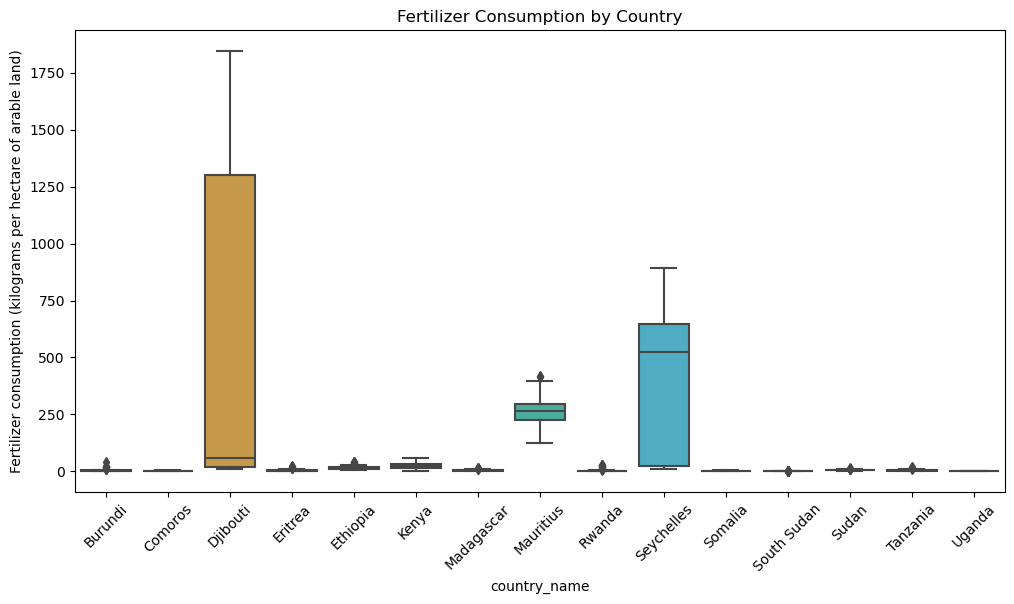

In [29]:
# Boxplot by country (optional)
plt.figure(figsize=(12,6))
sns.boxplot(x='country_name', y='Fertilizer consumption (kilograms per hectare of arable land)', data=df)
plt.xticks(rotation=45)
plt.title('Fertilizer Consumption by Country')
plt.show()


We can see Djibouti and Seychelles are the top, in terms of fertilizer consumption in kgs per hectare.

### Arable land per person

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


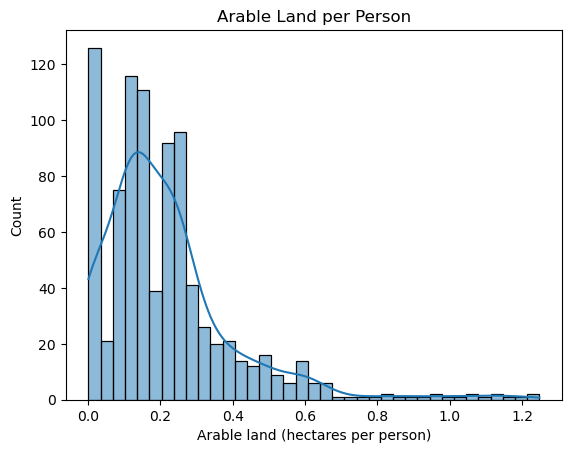

In [30]:
sns.histplot(df['Arable land (hectares per person)'], kde=True)
plt.title('Arable Land per Person')
plt.show()

### Average precipitation

### Agriculture, forestry, and fishing value added (US$)

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


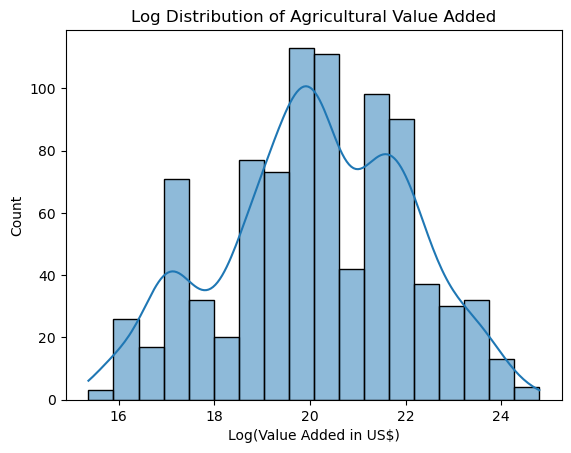

In [31]:
sns.histplot(np.log1p(df['Agriculture, forestry, and fishing, value added (current US$)']), kde=True)
plt.title('Log Distribution of Agricultural Value Added')
plt.xlabel('Log(Value Added in US$)')
plt.show()


### Crop production index

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


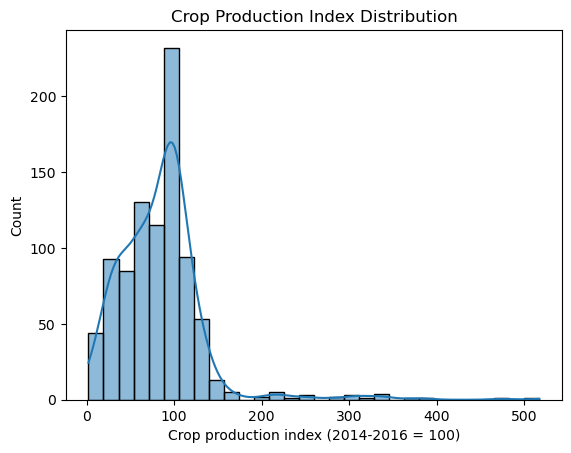

In [32]:
sns.histplot(df['Crop production index (2014-2016 = 100)'], kde=True, bins=30)
plt.title('Crop Production Index Distribution')
plt.show()


### Cereal production (metric tons) and Cereal yield (kg/hectare)

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


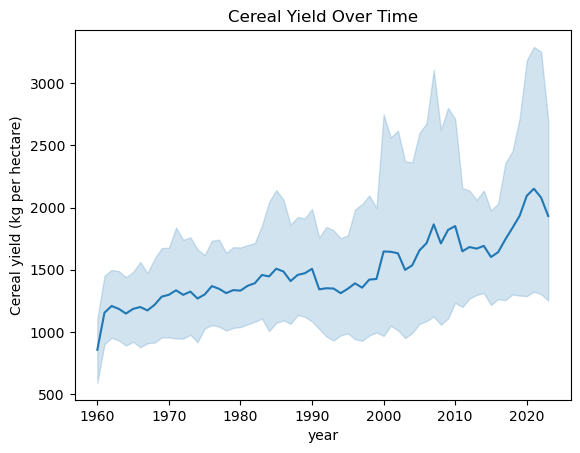

In [33]:
sns.lineplot(x='year', y='Cereal yield (kg per hectare)', data=df)
plt.title('Cereal Yield Over Time')
plt.show()


### Employment in agriculture (% of total employment)

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


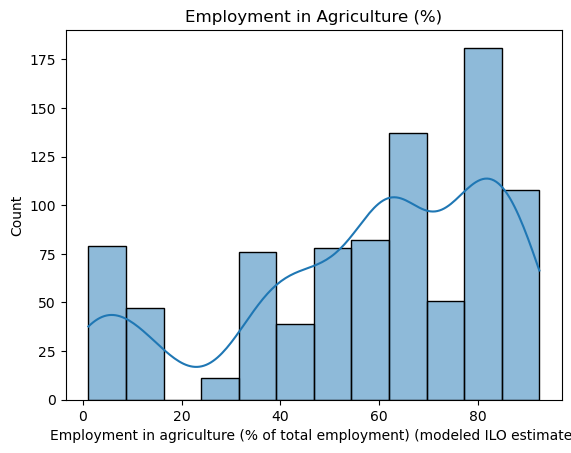

In [34]:
sns.histplot(df['Employment in agriculture (% of total employment) (modeled ILO estimate)'], kde=True)
plt.title('Employment in Agriculture (%)')
plt.show()


### Arable land per person and Average precipitation

# Multivariate Analysis

In [36]:
#focused cols for multivariate analysis
cols = [
    "Fertilizer consumption (kilograms per hectare of arable land)",
    "Arable land (hectares per person)",
    "Average precipitation in depth (mm per year)",
    "Crop production index (2014-2016 = 100)",
    "Employment in agriculture (% of total employment) (modeled ILO estimate)",
    "Cereal yield (kg per hectare)"
]
df_mv = df[cols].dropna()

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

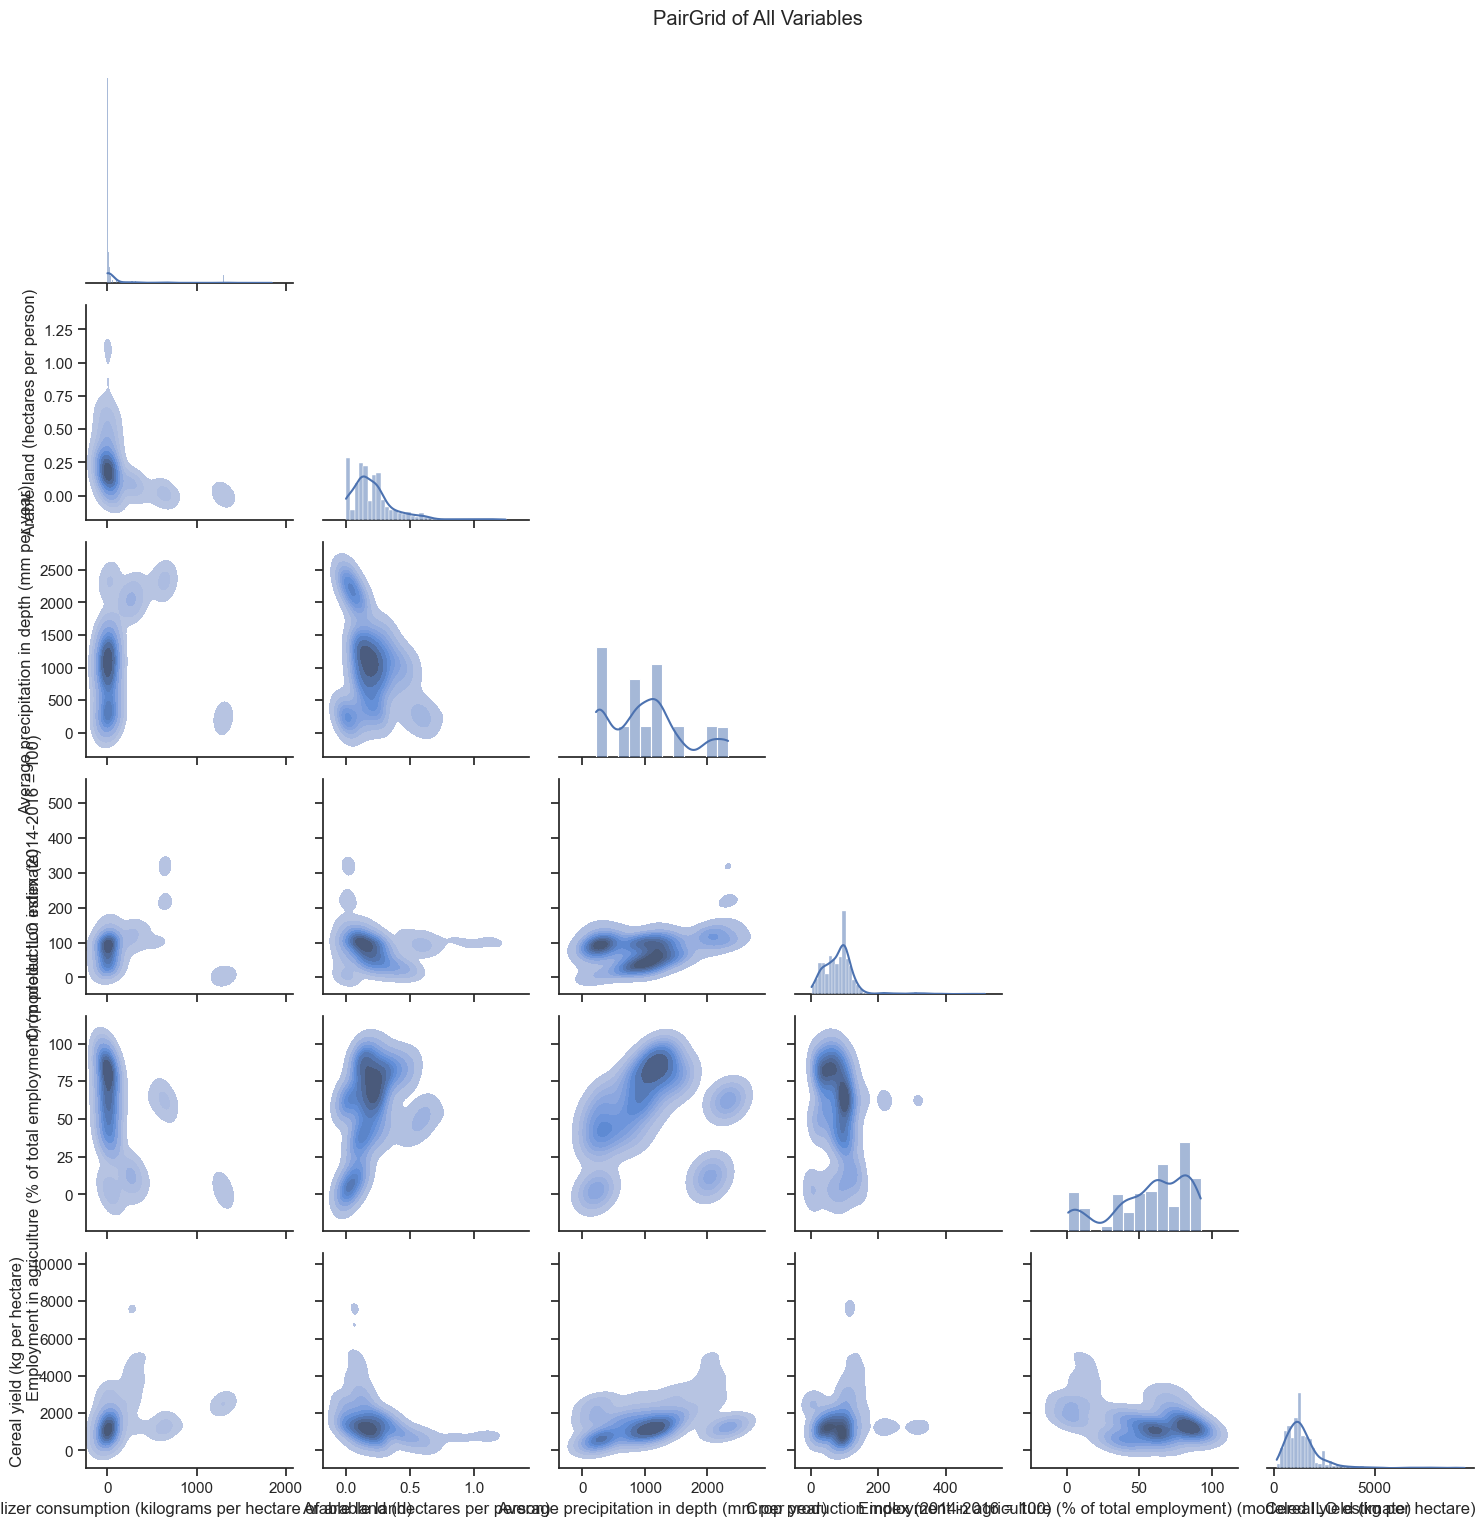

In [37]:
# PairGrid with country‐hue (multivariate view)
sns.set(style="ticks")
g = sns.PairGrid(df_mv, corner=True)
g.map_upper(sns.scatterplot, s=20, alpha=0.6)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
plt.suptitle("PairGrid of All Variables", y=1.02)
plt.show()

In [39]:
from pandas.plotting import parallel_coordinates



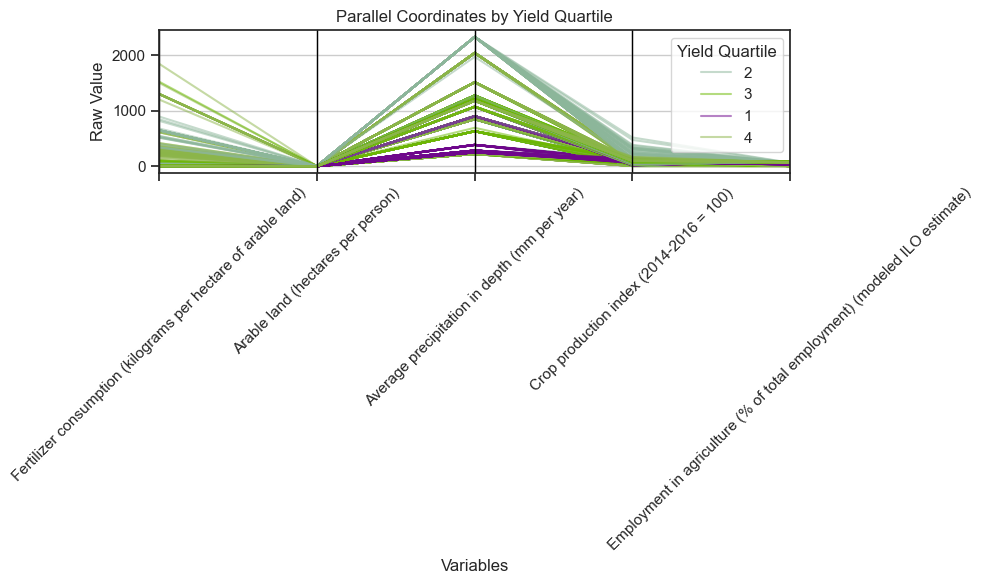

In [44]:
# Parallel coordinates by quartile of yield
#    (groups observations by high/low yield to see multivariate patterns)
# Map quartile labels to numeric values
df_mv["YieldQuartile"] = pd.qcut(df_mv["Cereal yield (kg per hectare)"], 4, labels=["Q1","Q2","Q3","Q4"])
df_mv["YieldQuartile"] = df_mv["YieldQuartile"].map({"Q1": 1, "Q2": 2, "Q3": 3, "Q4": 4})

plt.figure(figsize=(10,6))
parallel_coordinates(df_mv, class_column="YieldQuartile", cols=cols[:-1], alpha=0.5)
plt.title("Parallel Coordinates by Yield Quartile")
plt.xlabel("Variables")
plt.ylabel("Raw Value")
plt.legend(title="Yield Quartile")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

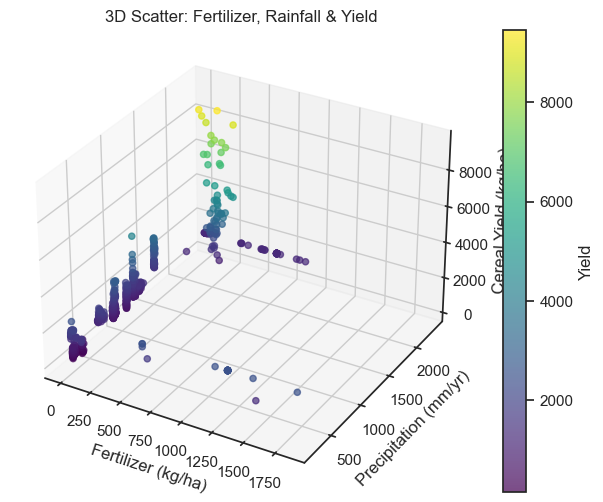

In [45]:
# 3D scatter of three key predictors vs. yield
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
x = df_mv["Fertilizer consumption (kilograms per hectare of arable land)"]
y = df_mv["Average precipitation in depth (mm per year)"]
z = df_mv["Cereal yield (kg per hectare)"]
p = ax.scatter(x, y, z, c=z, cmap="viridis", alpha=0.7)
ax.set_xlabel("Fertilizer (kg/ha)")
ax.set_ylabel("Precipitation (mm/yr)")
ax.set_zlabel("Cereal Yield (kg/ha)")
fig.colorbar(p, ax=ax, label="Yield")
plt.title("3D Scatter: Fertilizer, Rainfall & Yield")
plt.show()

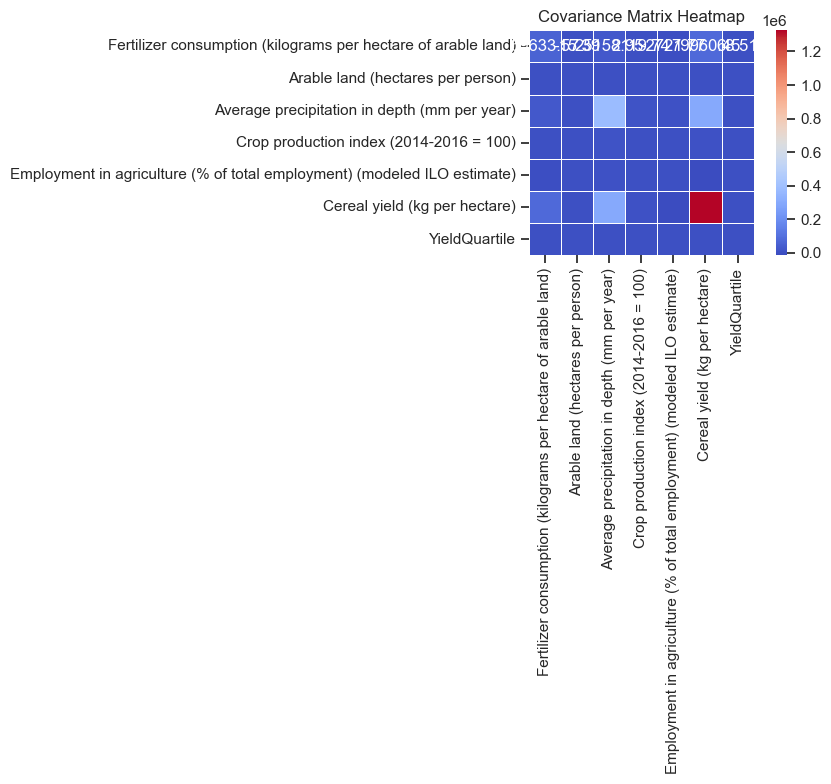

In [48]:
# Covariance matrix (multivariate dispersion)
cov = df_mv.cov()
# Heatmap for Covariance Matrix Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(cov, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True, square=True)
plt.title("Covariance Matrix Heatmap")
plt.tight_layout()
plt.show()